#Classification with deep learning RNN

##Load data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("IMDB Dataset.csv", nrows = 25000)

In [3]:
df.shape

(25000, 2)

In [4]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
#HTML tags
import re
def remove_html_tags(reviews):
    return re.sub(r'<[^<]+?>', '', reviews)

df['review'] = df['review'].apply(remove_html_tags)

In [6]:
#HTTP

def remove_url(text):
    return re.sub(r'http[s]?://\S+|www\.\S+', '', text)
df['review'] = df['review'].apply(remove_url)

In [7]:
#to lower case
def to_lower(text):
  return  text.lower()
df['review'] = df['review'].apply(to_lower)

In [8]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


In [ ]:
#DIY (Do it yourself)
"""
# Initialize lists to store reviews and labels
reviews = ???
labels = ???

# Display some examples to verify
print("Sample reviews:", reviews[:2])
print("Sample labels:", labels[:2])
"""

In [9]:
#SOLUTION
# Initialize lists to store reviews and labels
reviews = df['review'].tolist()
labels = df['sentiment'].tolist()

# Display some examples to verify
print("Sample reviews:", reviews[:2])
print("Sample labels:", labels[:2])


Sample reviews: ["one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked. they are right, as this is exactly what happened with me.the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word.it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.i would say the main appeal of the show is due to the fact that it goes whe

In [10]:
import warnings
warnings.filterwarnings("ignore")

In [11]:
import nltk
from nltk.tokenize import sent_tokenize

In [12]:
reviews[0]

"one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked. they are right, as this is exactly what happened with me.the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word.it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.i would say the main appeal of the show is due to the fact that it goes where other shows wo

In [13]:
labels[0]

'positive'

## Tokenize using NLTK

In [14]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer("\w+")

In [15]:
tokenizer.tokenize("I didn't like to read that book.")

['I', 'didn', 't', 'like', 'to', 'read', 'that', 'book']

In [16]:
tokenizer.tokenize(reviews[10])

['phil',
 'the',
 'alien',
 'is',
 'one',
 'of',
 'those',
 'quirky',
 'films',
 'where',
 'the',
 'humour',
 'is',
 'based',
 'around',
 'the',
 'oddness',
 'of',
 'everything',
 'rather',
 'than',
 'actual',
 'punchlines',
 'at',
 'first',
 'it',
 'was',
 'very',
 'odd',
 'and',
 'pretty',
 'funny',
 'but',
 'as',
 'the',
 'movie',
 'progressed',
 'i',
 'didn',
 't',
 'find',
 'the',
 'jokes',
 'or',
 'oddness',
 'funny',
 'anymore',
 'its',
 'a',
 'low',
 'budget',
 'film',
 'thats',
 'never',
 'a',
 'problem',
 'in',
 'itself',
 'there',
 'were',
 'some',
 'pretty',
 'interesting',
 'characters',
 'but',
 'eventually',
 'i',
 'just',
 'lost',
 'interest',
 'i',
 'imagine',
 'this',
 'film',
 'would',
 'appeal',
 'to',
 'a',
 'stoner',
 'who',
 'is',
 'currently',
 'partaking',
 'for',
 'something',
 'similar',
 'but',
 'better',
 'try',
 'brother',
 'from',
 'another',
 'planet']

We do not want didn't to be split into did 'nt. Adapt the regular expression in cell below

In [ ]:
#DIY
"""
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer("???)
"""

In [17]:
#SOLUTION
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer("\w+\'?\w+|\w+")

In [18]:
tokenizer.tokenize("I didn't like to read that book.")

['I', "didn't", 'like', 'to', 'read', 'that', 'book']

In [19]:
tokenizer.tokenize(reviews[10])

['phil',
 'the',
 'alien',
 'is',
 'one',
 'of',
 'those',
 'quirky',
 'films',
 'where',
 'the',
 'humour',
 'is',
 'based',
 'around',
 'the',
 'oddness',
 'of',
 'everything',
 'rather',
 'than',
 'actual',
 'punchlines',
 'at',
 'first',
 'it',
 'was',
 'very',
 'odd',
 'and',
 'pretty',
 'funny',
 'but',
 'as',
 'the',
 'movie',
 'progressed',
 'i',
 "didn't",
 'find',
 'the',
 'jokes',
 'or',
 'oddness',
 'funny',
 'anymore',
 'its',
 'a',
 'low',
 'budget',
 'film',
 'thats',
 'never',
 'a',
 'problem',
 'in',
 'itself',
 'there',
 'were',
 'some',
 'pretty',
 'interesting',
 'characters',
 'but',
 'eventually',
 'i',
 'just',
 'lost',
 'interest',
 'i',
 'imagine',
 'this',
 'film',
 'would',
 'appeal',
 'to',
 'a',
 'stoner',
 'who',
 'is',
 'currently',
 'partaking',
 'for',
 'something',
 'similar',
 'but',
 'better',
 'try',
 'brother',
 'from',
 'another',
 'planet']

In [20]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


##Stopwords using NLTK and SpaCy

In [21]:
from spacy.lang.en.stop_words import STOP_WORDS

In [22]:
exceptionStopWords = {
    'again',
    'against',
    'ain',
    'almost',
    'among',
    'amongst',
    'amount',
    'anyhow',
    'anyway',
    'aren',
    "aren't",
    'below',
    'bottom',
    'but',
    'cannot',
    'couldn',
    "couldn't",
    'didn',
    "didn't",
    'doesn',
    "doesn't",
    'don',
    "don't",
    'done',
    'down',
    'except',
    'few',
    'hadn',
    "hadn't",
    'hasn',
    "hasn't",
    'haven',
    "haven't",
    'however',
    'isn',
    "isn't",
    'least',
    'mightn',
    "mightn't",
    'move',
    'much',
    'must',
    'mustn',
    "mustn't",
    'needn',
    "needn't",
    'neither',
    'never',
    'nevertheless',
    'no',
    'nobody',
    'none',
    'noone',
    'nor',
    'not',
    'nothing',
    'should',
    "should've",
    'shouldn',
    "shouldn't",
    'too',
    'top',
    'up',
    'very'
    'wasn',
    "wasn't",
    'well',
    'weren',
    "weren't",
    'won',
    "won't",
    'wouldn',
    "wouldn't",
}

In [23]:
stop_words = set(stop_words).union(STOP_WORDS)

Remove exception words from stopwords

In [ ]:
#DIY
"""
final_stop_words = ???
"""

In [24]:
#SOLUTION
final_stop_words = stop_words-exceptionStopWords

In [25]:
import spacy

nlp = spacy.load("en_core_web_sm")

In [26]:
def make_token(review):
    return tokenizer.tokenize(str(review))

In [27]:
make_token(reviews[0])

['one',
 'of',
 'the',
 'other',
 'reviewers',
 'has',
 'mentioned',
 'that',
 'after',
 'watching',
 'just',
 '1',
 'oz',
 'episode',
 "you'll",
 'be',
 'hooked',
 'they',
 'are',
 'right',
 'as',
 'this',
 'is',
 'exactly',
 'what',
 'happened',
 'with',
 'me',
 'the',
 'first',
 'thing',
 'that',
 'struck',
 'me',
 'about',
 'oz',
 'was',
 'its',
 'brutality',
 'and',
 'unflinching',
 'scenes',
 'of',
 'violence',
 'which',
 'set',
 'in',
 'right',
 'from',
 'the',
 'word',
 'go',
 'trust',
 'me',
 'this',
 'is',
 'not',
 'a',
 'show',
 'for',
 'the',
 'faint',
 'hearted',
 'or',
 'timid',
 'this',
 'show',
 'pulls',
 'no',
 'punches',
 'with',
 'regards',
 'to',
 'drugs',
 'sex',
 'or',
 'violence',
 'its',
 'is',
 'hardcore',
 'in',
 'the',
 'classic',
 'use',
 'of',
 'the',
 'word',
 'it',
 'is',
 'called',
 'oz',
 'as',
 'that',
 'is',
 'the',
 'nickname',
 'given',
 'to',
 'the',
 'oswald',
 'maximum',
 'security',
 'state',
 'penitentary',
 'it',
 'focuses',
 'mainly',
 'on',


Remove stopwords from tokens in the reviews

In [ ]:
#DIY
"""
def remove_stopwords(review):
    return [token for token ???]
"""

In [28]:
#SOLUTION
def remove_stopwords(review):
    return [token for token in review if token not in final_stop_words]

In [29]:
type(reviews[0])

str

## Lemmatization using SpaCy

Lemmatize token input and append it to lemma_result list

In [ ]:
#DIY
# Load the large English model
#nlp = spacy.load('en_core_web_lg')
"""
def lemmatization(review):
    lemma_result = []

    # Join the list of words into a single string
    #
    review_text = ' '.join(review)

    # Process the text
    doc = nlp(review_text)

    # Extract lemmas, and append to lemma_result list
    for token in doc:
        ???

    return lemma_result
"""

In [30]:
#SOLUTION


def lemmatization(review):
    lemma_result = []

    # Join the list of words into a single string
    #
    review_text = ' '.join(review)

    # Process the text
    doc = nlp(review_text)

    # Extract lemmas
    for token in doc:
        lemma_result.append(token.lemma_)

    return lemma_result

##Pipeline for tokenization and lemmatization

Make a pipeline function this time for tokenization ONLY

In [ ]:
#DIY TOKENIZATION ONLY
"""
def pipeline(review):





"""

In [35]:
#SOLUTION TOKENIZATION ONLY
def pipeline(review):
    return make_token(review)
    #review = remove_stopwords(review)
    #return lemmatization(review)

In [36]:
%%time
#reviews = list(map(lambda review: pipeline(review),reviews))
reviews = [pipeline(review) for review in reviews]

CPU times: user 2.22 s, sys: 184 ms, total: 2.41 s
Wall time: 2.41 s


In [37]:
reviews[:2]

[['one',
  'of',
  'the',
  'other',
  'reviewers',
  'has',
  'mentioned',
  'that',
  'after',
  'watching',
  'just',
  '1',
  'oz',
  'episode',
  "you'll",
  'be',
  'hooked',
  'they',
  'are',
  'right',
  'as',
  'this',
  'is',
  'exactly',
  'what',
  'happened',
  'with',
  'me',
  'the',
  'first',
  'thing',
  'that',
  'struck',
  'me',
  'about',
  'oz',
  'was',
  'its',
  'brutality',
  'and',
  'unflinching',
  'scenes',
  'of',
  'violence',
  'which',
  'set',
  'in',
  'right',
  'from',
  'the',
  'word',
  'go',
  'trust',
  'me',
  'this',
  'is',
  'not',
  'a',
  'show',
  'for',
  'the',
  'faint',
  'hearted',
  'or',
  'timid',
  'this',
  'show',
  'pulls',
  'no',
  'punches',
  'with',
  'regards',
  'to',
  'drugs',
  'sex',
  'or',
  'violence',
  'its',
  'is',
  'hardcore',
  'in',
  'the',
  'classic',
  'use',
  'of',
  'the',
  'word',
  'it',
  'is',
  'called',
  'oz',
  'as',
  'that',
  'is',
  'the',
  'nickname',
  'given',
  'to',
  'the',


##Word2Vec word embeddings

In [38]:
import gensim
from gensim.models import Word2Vec

In [39]:
embedding_dimension = 100

In [40]:
#model = Word2Vec(processed_reviews,size=embedding_dimension, window=3, min_count=3, workers=4)
#size not correct anymore, should be vector_size
model = Word2Vec(reviews,vector_size=embedding_dimension, window=3, min_count=3, workers=4)


In [41]:
model.sg

0

In [42]:
word_vectors = model.wv

In [43]:
del model

In [44]:
# Using key_to_index to get the number of unique words
vocab_size = len(word_vectors.key_to_index)
print(f"Vocabulary size: {vocab_size}")




Vocabulary size: 40281


In [45]:
# List of words in the vocabulary
words = list(word_vectors.key_to_index.keys())
print(f"First 10 words in vocabulary: {words[:10]}")

First 10 words in vocabulary: ['the', 'and', 'a', 'of', 'to', 'is', 'in', 'it', 'i', 'this']


In [46]:
len(words)

40281

In [47]:
len(word_vectors)

40281

In [48]:
word_vectors.similar_by_word(word="good", topn=5)

[('decent', 0.7496685981750488),
 ('bad', 0.7308526039123535),
 ('great', 0.7277749180793762),
 ('cool', 0.7077300548553467),
 ('fine', 0.6801692247390747)]

In [49]:
word_vectors.similar_by_word(word="bad", topn=5)

[('terrible', 0.764896035194397),
 ('horrible', 0.7452728152275085),
 ('awful', 0.7334814071655273),
 ('dumb', 0.7309995889663696),
 ('stupid', 0.7309863567352295)]

In [50]:
word_vectors.most_similar(positive="bad",topn=4)

[('terrible', 0.764896035194397),
 ('horrible', 0.7452728152275085),
 ('awful', 0.7334814071655273),
 ('dumb', 0.7309995889663696)]

In [51]:
word_vectors.similarity("good","bad")

0.7308527

In [52]:
word_vectors.similarity("good","be")

0.12501566

In [53]:
word_vectors.similar_by_word(word="school", topn=5)

[('college', 0.6709754467010498),
 ('cooley', 0.6604551076889038),
 ('schooler', 0.6547446846961975),
 ('pitched', 0.6541779041290283),
 ('slaughter', 0.6043943166732788)]

In [54]:
word_vectors.similar_by_word(word="school", topn=5)

[('college', 0.6709754467010498),
 ('cooley', 0.6604551076889038),
 ('schooler', 0.6547446846961975),
 ('pitched', 0.6541779041290283),
 ('slaughter', 0.6043943166732788)]

In [55]:
word_vectors.similar_by_word(word="action", topn=5)

[('suspense', 0.6659226417541504),
 ('horror', 0.6359784007072449),
 ('gore', 0.6195727586746216),
 ('exciting', 0.6017054915428162),
 ('slasher', 0.5954172611236572)]

In [56]:
word_vectors.similar_by_word(word="sad", topn=5)

[('depressing', 0.6751875281333923),
 ('surprising', 0.6631906032562256),
 ('ironic', 0.6550790071487427),
 ('disturbing', 0.6514787077903748),
 ('disappointing', 0.6451236605644226)]

In [57]:
word_vectors.most_similar(negative=["bad"],positive=["decent"],topn=5)

[('tremendous', 0.39370197057724),
 ('solid', 0.38865265250205994),
 ('wider', 0.3565101623535156),
 ('splendid', 0.35529035329818726),
 ('slight', 0.3488096296787262)]

##RNN classifier


## Recurrent Neural Networks (RNNs)

Recurrent Neural Networks (RNNs) are a type of neural network specifically designed to identify patterns in sequential data, including time series, speech, text, and video. Unlike traditional feedforward neural networks, RNNs have cyclical connections that enable them to retain information from previous inputs. This feature makes RNNs exceptionally effective for tasks that require understanding context and processing information in a sequence.

### Basic Structure of RNNs
The image below depicts the structure of a Recurrent Neural Network (RNN) and its unfolding over time. On the left side, you see a basic RNN cell that processes an input $I$ to generate an output $O$. A distinctive feature of the RNN cell is the loop, showing that the output from the previous step is fed back into the current step as input. This feedback mechanism enables the network to maintain and utilize information across multiple time steps.

### Working Mechanism
The image below illustrates the structure of an RNN and its unfolding over time. The left side of the image shows a simple RNN cell, which processes an input $I$ to produce an output $O$. The key feature of the RNN cell is the loop, indicating that the output from the previous step is fed back as input to the current step. This feedback loop allows the network to retain information across multiple time steps.

At each time step $t$, the RNN cell takes the current input $I_t$ and the hidden state from the previous time step $h_{t-1}$ to compute the current hidden state $h_t$. The hidden state $h_t$ is then used to produce the output $O_t$. Mathematically, this can be represented as:

$ h_t = \sigma(W \cdot I_t + U \cdot h_{t-1} + b) $

$ O_t = V \cdot h_t + c $

where $W$, $U$, and $V$ are weight matrices, $b$ and $c$ are biases, and $\sigma$ is the activation function.

- **$W$**: This is the weight matrix that connects the input $I_t$ to the hidden state $h_t$. It determines how much influence the current input has on the hidden state.
- **$U$**: This is the weight matrix that connects the hidden state from the previous time step $h_{t-1}$ to the current hidden state $h_t$. It defines how the previous hidden state influences the current hidden state.
- **$V$**: This is the weight matrix that connects the current hidden state $h_t$ to the output $O_t$. It determines how the hidden state influences the output of the network.

In summary, $W$, $U$, and $V$ are essential parameters in an RNN that control the transformation and influence of inputs, previous hidden states, and the hidden state on the output, respectively.





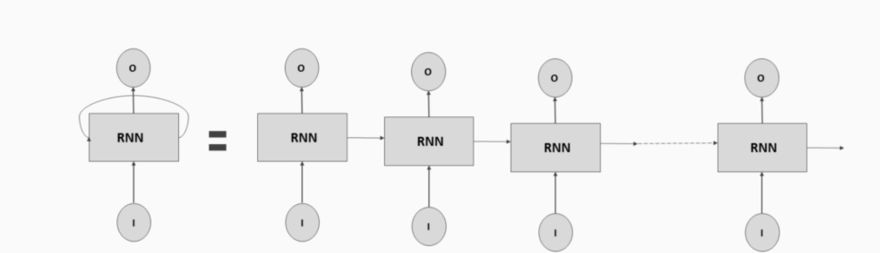



### Unfolding in Time
To understand how RNNs process sequences, we can unfold the network across time, as shown on the right side of the image. Each RNN cell in the unfolded network represents the same RNN cell at different time steps. The input at each time step is denoted by \( I \), and the corresponding output is denoted by \( O \). This unfolding demonstrates how information is passed through the network from one time step to the next.



### Benefits and Challenges
The primary advantage of RNNs is their ability to model temporal dependencies and sequential information. This makes them suitable for various applications such as language modeling, speech recognition, and time series prediction.

However, RNNs also face challenges such as the vanishing gradient problem, where gradients can become very small, making it difficult to train the network effectively for long sequences. Variants of RNNs, like Long Short-Term Memory (LSTM) networks and Gated Recurrent Units (GRUs), have been developed to address these issues by incorporating mechanisms to preserve gradients and maintain long-term dependencies.

In summary, RNNs are powerful tools for sequence modeling, leveraging their recurrent connections to process and remember information across time steps. Their unfolding in time demonstrates how they handle sequential data, making them essential in tasks where the order and context of data points are crucial.



###PyTorch and Cuda

In [58]:
import torch

In [59]:
torch.cuda.is_available()

True

In [60]:
import torch
import torch.nn as nn
import torch.optim as optim
SEED = 2222

torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
#cuda seed should be same
torch.backends.cudnn.deterministic = True

###Word2Vec word embeddings
Convert words into their respective indices using a given (Word2Vec) embedding model, returning a tensor of these indices, which is suitable for input into RNN classifier

In [61]:
def word2idx(embedding_model, review):
    index_review = []
    for word in review:
        try:
            index_review.append(embedding_model.key_to_index[word])
        except KeyError:
            pass  # or you can add an index for unknown words if you handle them
    return torch.tensor(index_review, dtype=torch.long)


###Padding

In [62]:

padding_value = len(word_vectors.index_to_key)

In [63]:
padding_value

40281

In [64]:
index_review = list(map(lambda review: word2idx(word_vectors,review),reviews))

In [65]:
index_review

[tensor([   25,     3,     0,    75,  2009,    43,  1006,    10,    98,   145,
            37,   316,  3299,   425,   450,    24,  3093,    31,    21,   195,
            12,     9,     5,   603,    46,   593,    13,    67,     0,    85,
           147,    10,  3410,    67,    39,  3299,    11,    89,  5420,     1,
         18316,   131,     3,   545,    58,   269,     6,   195,    34,     0,
           646,   136,  1693,    67,     9,     5,    19,     2,   116,    14,
             0,  8157,  2250,    36, 11229,     9,   116,  2530,    52,  5535,
            13,  5249,     4,  1344,   381,    36,   545,    89,     5,  3898,
             6,     0,   351,   346,     3,     0,   646,     7,     5,   435,
          3299,    12,    10,     5,     0, 14298,   357,     4,     0, 13751,
          5823,  2744,  1174,     7,  2763,  1400,    18, 23223,   520,    30,
          4836,  2691,     3,     0,  1228,   117,    27,     0,  7000,    23,
          3063, 10613,     1,   383,    32, 16810,  

In [66]:
embedding_weights = torch.Tensor(word_vectors.vectors)

### Recurrent Neural Network (RNN) class for processing sequences of text data in PyTorch

Next code block defines a recurrent neural network (RNN) using PyTorch, structured to handle sequences of text data:

- **Class Definition**: The `RNN` class extends `nn.Module` and is designed to perform sequence processing. It initializes with an embedding layer, an RNN layer, and a fully connected layer:
  - `Embedding Layer`: Transforms input indices into dense vectors of a specified size using pre-trained embeddings.
  - `RNN Layer`: Processes the sequence of embeddings using a hidden state of specified dimension.
  - `Fully Connected Layer`: Maps the hidden state of the RNN to the desired output dimension.

- **Forward Pass**:
  - Inputs are first transformed by the embedding layer.
  - The embedded sequences are then packed according to their lengths to handle variable-sized inputs efficiently.
  - The packed embeddings are processed by the RNN to produce outputs and a final hidden state.
  - The outputs are unpacked and the last hidden state is passed through the fully connected layer to produce the final model outputs.

- **Model Initialization**:
  - The model is instantiated with specific dimensions for input, embedding, hidden state, and output, along with pre-trained embedding weights.

This setup is typical for tasks like text classification, where each input sequence (e.g., a sentence or a document) is processed as a whole to predict a single output (e.g., sentiment).


In [67]:
# RNN Class with one hidden layer: DEFAULT
class RNN(nn.Module):
    def __init__(self, input_dim, embedding_dim, hidden_dim, output_dim, embedding_weights):
        super().__init__()
        # Embedding layer with pre-trained weights
        self.embedding = nn.Embedding.from_pretrained(embedding_weights)
        # RNN layer: processes sequences of embeddings using a hidden state
        self.rnn = nn.RNN(embedding_dim, hidden_dim)
        # Fully connected layer: maps the final hidden state to the output dimension
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x, text_lengths):
        # x: [sentence length, batch size] - shape of input data
        # Embedding layer transforms indices to embeddings: [sentence length, batch size, embedding dim]
        embedded = self.embedding(x)
        # Pack the sequence of embeddings based on actual sequence lengths
        packed_embedded = nn.utils.rnn.pack_padded_sequence(embedded, text_lengths)
        # RNN processes the packed sequence, returning packed output and the last hidden states
        packed_output, hidden = self.rnn(packed_embedded)  # [sentence length, batch size, hidden dim], [1, batch size, hidden dim]
        # Unpack the output to a normal sequence format
        output, output_lengths = nn.utils.rnn.pad_packed_sequence(packed_output)
        # Return the final output by passing the last hidden state through a fully connected layer
        return self.fc(hidden.squeeze(0))

# Parameters for the RNN model
INPUT_DIM = padding_value  # Usually the size of the vocabulary or a padding index
EMBEDDING_DIM = 100  # Dimensionality of the embedding space
HIDDEN_DIM = 256  # Number of units in the hidden layer of the RNN
OUTPUT_DIM = 1  # The dimensionality of the output space

# Initialize the RNN model with specified dimensions and pre-trained embedding weights
model = RNN(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM, embedding_weights)


In [ ]:
#with 3 hidden layers
"""
import torch
import torch.nn as nn
import torch.nn.functional as F

class CustomRNN(nn.Module):
    def __init__(self, input_dim, embedding_dim, hidden_dims, output_dim, embedding_weights):
        super().__init__()
        self.embedding = nn.Embedding.from_pretrained(embedding_weights)

        # Define the first RNN layer
        self.rnn1 = nn.RNN(embedding_dim, hidden_dims[0], batch_first=False)

        # Define the second RNN layer
        self.rnn2 = nn.RNN(hidden_dims[0], hidden_dims[1], batch_first=False)

        # Define the third RNN layer
        self.rnn3 = nn.RNN(hidden_dims[1], hidden_dims[2], batch_first=False)

        # Define the fully connected layer
        self.fc = nn.Linear(hidden_dims[2], output_dim)

    def forward(self, x, text_lengths):
        # x [sentence length, batch size]
        embedded = self.embedding(x)  # [sentence length, batch size, embedding dim]

        # Pack the embedded sequences
        packed_embedded = nn.utils.rnn.pack_padded_sequence(embedded, text_lengths, enforce_sorted=False)

        # Pass through the first RNN layer
        packed_output, hidden1 = self.rnn1(packed_embedded)

        # Unpack the output for the next layer
        output, _ = nn.utils.rnn.pad_packed_sequence(packed_output)

        # Pack the sequences again for the next RNN layer
        packed_output = nn.utils.rnn.pack_padded_sequence(output, text_lengths, enforce_sorted=False)

        # Pass through the second RNN layer
        packed_output, hidden2 = self.rnn2(packed_output)

        # Unpack the output for the next layer
        output, _ = nn.utils.rnn.pad_packed_sequence(packed_output)

        # Pack the sequences again for the next RNN layer
        packed_output = nn.utils.rnn.pack_padded_sequence(output, text_lengths, enforce_sorted=False)

        # Pass through the third RNN layer
        packed_output, hidden3 = self.rnn3(packed_output)

        # Unpack the final output
        output, _ = nn.utils.rnn.pad_packed_sequence(packed_output)

        # We use the hidden state from the last layer
        return self.fc(hidden3[-1].squeeze(0))  # [batch size, output dim]

# Example usage:
# Assuming embedding_weights is a tensor containing the pre-trained embeddings
input_dim = padding_value  # Example vocabulary size
embedding_dim = 100  # Example embedding dimension
hidden_dims = [128, 256, 512]  # Hidden dimensions for each RNN layer
output_dim = 1  # Example number of output classes
#embedding_weights = torch.randn(input_dim, embedding_dim)  # Example embedding weights

# Create the model with specified dimensions
model = CustomRNN(input_dim, embedding_dim, hidden_dims, output_dim, embedding_weights)

# Example input data
#example_batch = torch.randint(0, input_dim, (10, 32))  # [sentence length, batch size]
#example_lengths = torch.tensor([10] * 32)  # [batch size], all sequences of length 10

# Forward pass through the model
#output = model(example_batch, example_lengths)
#print(output.shape)  # Should be [batch size, output dim]
"""


'\nimport torch\nimport torch.nn as nn\nimport torch.nn.functional as F\n\nclass CustomRNN(nn.Module):\n    def __init__(self, input_dim, embedding_dim, hidden_dims, output_dim, embedding_weights):\n        super().__init__()\n        self.embedding = nn.Embedding.from_pretrained(embedding_weights)\n\n        # Define the first RNN layer\n        self.rnn1 = nn.RNN(embedding_dim, hidden_dims[0], batch_first=False)\n\n        # Define the second RNN layer\n        self.rnn2 = nn.RNN(hidden_dims[0], hidden_dims[1], batch_first=False)\n\n        # Define the third RNN layer\n        self.rnn3 = nn.RNN(hidden_dims[1], hidden_dims[2], batch_first=False)\n\n        # Define the fully connected layer\n        self.fc = nn.Linear(hidden_dims[2], output_dim)\n\n    def forward(self, x, text_lengths):\n        # x [sentence length, batch size]\n        embedded = self.embedding(x)  # [sentence length, batch size, embedding dim]\n\n        # Pack the embedded sequences\n        packed_embedded = 

In [68]:
model

RNN(
  (embedding): Embedding(40281, 100)
  (rnn): RNN(100, 256)
  (fc): Linear(in_features=256, out_features=1, bias=True)
)

In [ ]:
#model with 1 hidden layer

RNN(
  (embedding): Embedding(31189, 100)
  (rnn): RNN(100, 256)
  (fc): Linear(in_features=256, out_features=1, bias=True)
)

###Optimizer

In [69]:
# Initialize the optimizer to update the model's parameters. SGD (Stochastic Gradient Descent) is used here with a learning rate of 0.001.
# This optimizer will adjust the parameters (weights and biases) of the 'model' based on the gradients computed during backpropagation.
optimizer = optim.SGD(model.parameters(), lr=1e-3)


###Loss function

In [70]:
# Initialize the loss function 'criterion' with Binary Cross-Entropy with Logits Loss.
# This loss combines a sigmoid layer and the BCE loss in one single class, which makes it more numerically stable than using a plain Sigmoid followed by a BCE loss.
criterion = nn.BCEWithLogitsLoss()


In [71]:
# Determine if CUDA (GPU support) is available in PyTorch environment; if so, use 'cuda' to run on GPU,
# otherwise fall back to 'cpu' for computation.
# This ensures that the model and tensors are allocated to the GPU if available, for faster computation,
# or to the CPU if a GPU is not accessible.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')



In [72]:
device.type

'cuda'

###Split data into train, development/validation set, test set

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
labels[:5]

['positive', 'positive', 'positive', 'negative', 'positive']

Convert 'positive' labels to 1, 'negative' labels to 0, using a list comprehension

In [ ]:
#DIY
"""
labels = [ ??? ]
"""

In [75]:
#SOLUTION
labels = [0 if label == 'negative' else 1 for label in labels ]

In [76]:
labels[:5]

[1, 1, 1, 0, 1]

In [ ]:
#we only use the first 10000 labels, as we only use the first 10000 reviews
#labels = labels[:10000]

In [77]:
X_train, X_test, y_train, y_test = train_test_split(index_review, labels, test_size=0.2)

In [78]:
len(labels)

25000

In [79]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [80]:
print(len(X_train),len(X_test),len(X_val))

16000 5000 4000


In [81]:
print(len(y_train),len(y_test),len(y_val))

16000 5000 4000


In [82]:
batch_size = 128
import numpy as np

###Iterator

An iterator is an object that enables the sequential traversal of a data collection, such as arrays or lists, without exposing the underlying structure. It provides several benefits:

- **Efficiency**: Iterators don't require all data to be loaded into memory, supporting lazy evaluation where elements are processed only as needed.
- **Decoupling**: By separating the iteration mechanism from the data structures, iterators allow algorithms to be flexible and reusable across different types of collections.
- **Control**: They offer methods to check for remaining elements and to retrieve each one, facilitating precise control over the iteration process.


In [83]:
def iterator_func(X, y):
    # Calculate the total number of samples in the dataset.
    size = len(X)
    # Create a permutation of indices from 0 to size-1 in random order.
    permutation = np.random.permutation(size)
    # Initialize the iterator list to store batches of data.
    iterator = []

    # Loop through the data in steps of 'batch_size' to create batches.
    for i in range(0, size, batch_size):
        # Get the indices for the current batch based on the random permutation.
        indices = permutation[i:i + batch_size]
        # Initialize a dictionary to store the current batch's data.
        batch = {}
        # Select the text samples corresponding to the current batch indices.
        batch["text"] = [X[i] for i in indices]
        # Select the labels corresponding to the current batch indices.
        batch["label"] = [y[i] for i in indices]

        # Sort the batch by the length of text samples in descending order to facilitate efficient batching.
        batch["text"], batch["label"] = zip(*sorted(zip(batch["text"], batch["label"]), key=lambda x: len(x[0]), reverse=True))
        # Compute the length of each text sample in the batch.
        batch["length"] = [len(review) for review in batch["text"]]
        # Convert the lengths to a tensor of type IntTensor.
        batch["length"] = torch.IntTensor(batch["length"])
        # Pad the sequences in the batch so they all have the same length, transpose to match expected input dimensions.
        batch["text"] = torch.nn.utils.rnn.pad_sequence(batch["text"], batch_first=True).t()
        # Convert the label list to a tensor.
        batch["label"] = torch.Tensor(batch["label"])

        # Move the tensors to the appropriate device (GPU or CPU).
        batch["label"] = batch["label"].to(device)
        batch["length"] = batch["length"].to(device)
        batch["text"] = batch["text"].to(device)

        # Append the prepared batch to the iterator list.
        iterator.append(batch)

    # Return the list of batches (iterator) that will be used for training or evaluation.
    return iterator


In [84]:
train_iterator = iterator_func(X_train,y_train)
valid_iterator = iterator_func(X_val,y_val)
test_iterator = iterator_func(X_test,y_test)

In [85]:
print(len(train_iterator),len(test_iterator),len(valid_iterator))

125 40 32


###Train and evaluate the model

In [86]:
model = model.to(device)
criterion = criterion.to(device)

In [87]:
def binary_accuracy(preds, y):
    # Apply sigmoid activation to predictions to map them to a [0,1] range.
    rounded_preds = torch.round(torch.sigmoid(preds))
    # Compare the rounded predictions to the actual labels to determine correctness.
    correct = (rounded_preds == y).float()  # Convert the boolean values to floats (True becomes 1.0, False becomes 0.0)
    # Calculate the accuracy as the ratio of correct predictions to the total number of predictions.
    acc = correct.sum() / len(correct)
    # Return the accuracy, which is a single number between 0 and 1.
    return acc


In [88]:
def train(model, iterator, optimizer, criterion):
    epoch_loss = 0
    epoch_acc = 0
    model.train()

    for batch in iterator:
        optimizer.zero_grad()

        # Convert input text to LongTensor and lengths to appropriate type
        text = batch["text"].long()
        length = batch["length"].cpu().long()  # Ensure lengths are on CPU and of type LongTensor

        predictions = model(text, length).squeeze(1)
        loss = criterion(predictions, batch["label"])
        acc = binary_accuracy(predictions, batch["label"])

        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        epoch_acc += acc.item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator)




In [89]:
def evaluate(model, iterator, criterion):
    epoch_loss = 0
    epoch_acc = 0
    model.eval()

    with torch.no_grad():
        for batch in iterator:
            # Convert input text to LongTensor and lengths to appropriate type
            text = batch["text"].long()
            length = batch["length"].cpu().long()  # Ensure lengths are on CPU and of type LongTensor

            predictions = model(text, length).squeeze(1)
            loss = criterion(predictions, batch["label"])
            acc = binary_accuracy(predictions, batch["label"])

            epoch_loss += loss.item()
            epoch_acc += acc.item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator)



In [90]:
#N_EPOCHS = 100 # for 3 hidden layers
N_EPOCHS = 40 # for 1 hidden layers

In [91]:
# Initialize lists to store loss and accuracy
train_losses = []
valid_losses = []
train_accuracies = []
valid_accuracies = []

# Training loop
for epoch in range(N_EPOCHS):
    train_loss, train_acc = train(model, train_iterator, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion)

    # Store the results
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    train_accuracies.append(train_acc)
    valid_accuracies.append(valid_acc)

    print(f'Epoch: {epoch+1:02}')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

Epoch: 01
	Train Loss: 0.699 | Train Acc: 50.26%
	 Val. Loss: 0.695 |  Val. Acc: 50.78%
Epoch: 02
	Train Loss: 0.696 | Train Acc: 51.42%
	 Val. Loss: 0.693 |  Val. Acc: 52.15%
Epoch: 03
	Train Loss: 0.693 | Train Acc: 52.18%
	 Val. Loss: 0.691 |  Val. Acc: 52.44%
Epoch: 04
	Train Loss: 0.691 | Train Acc: 53.06%
	 Val. Loss: 0.690 |  Val. Acc: 53.25%
Epoch: 05
	Train Loss: 0.689 | Train Acc: 53.84%
	 Val. Loss: 0.689 |  Val. Acc: 53.93%
Epoch: 06
	Train Loss: 0.687 | Train Acc: 54.66%
	 Val. Loss: 0.687 |  Val. Acc: 54.83%
Epoch: 07
	Train Loss: 0.685 | Train Acc: 55.41%
	 Val. Loss: 0.686 |  Val. Acc: 55.59%
Epoch: 08
	Train Loss: 0.684 | Train Acc: 56.14%
	 Val. Loss: 0.685 |  Val. Acc: 56.49%
Epoch: 09
	Train Loss: 0.682 | Train Acc: 56.94%
	 Val. Loss: 0.684 |  Val. Acc: 56.96%
Epoch: 10
	Train Loss: 0.681 | Train Acc: 57.44%
	 Val. Loss: 0.682 |  Val. Acc: 57.67%
Epoch: 11
	Train Loss: 0.679 | Train Acc: 57.99%
	 Val. Loss: 0.681 |  Val. Acc: 57.84%
Epoch: 12
	Train Loss: 0.678 | T

In [ ]:
#train and validation loss over 50 epochs for model with 1 hidden layer

In [ ]:
#train and validation loss over 100 epochs for model with 3 hidden layers




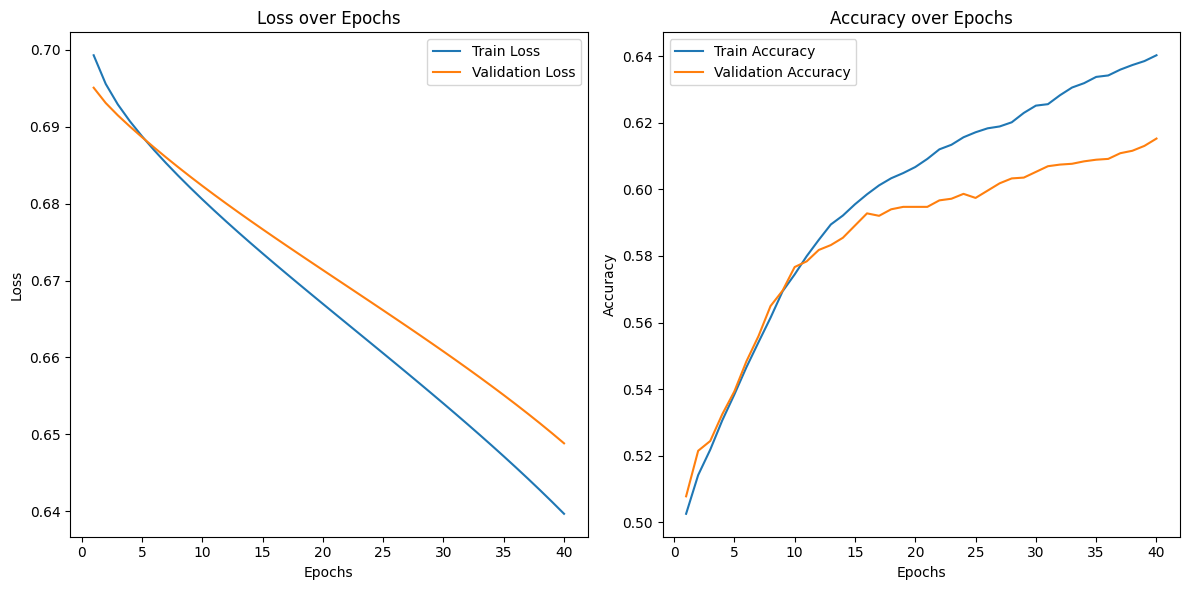

In [92]:
import matplotlib.pyplot as plt

# Plotting the loss and accuracy
plt.figure(figsize=(12, 6))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(range(1, N_EPOCHS + 1), train_losses, label='Train Loss')
plt.plot(range(1, N_EPOCHS + 1), valid_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, N_EPOCHS + 1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, N_EPOCHS + 1), valid_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
##loss function with 1 hidden layers and 50 epochs

In [ ]:
##loss function with 3 hidden layers and 100 epochs

In [ ]:
#loss function with 1 hidden layer

Complete print statement for loss and accuracy in the test set

In [ ]:
#DIY
"""
test_loss, test_acc = evaluate(model, test_iterator, criterion)

print(???)
"""

In [93]:
#SOLUTION

test_loss, test_acc = evaluate(model, test_iterator, criterion)

print(f'| Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}% |')

#LOWER RESULT AS COMPARED WITH STEMMING AND STOPWORD REMOVAL


| Test Loss: 0.640 | Test Acc: 63.52% |


In [ ]:
#test results 1 hidden layer 50 epochs

In [ ]:
#test results 3 hidden layers 100 epochs